In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#creating dataframes
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/CSE366/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/CSE366/test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# Data Cleaning and Preprocessing

In [6]:
# dropping unnecessary columns
train_df.drop(['PassengerId', 'Name', 'Cabin'], axis = 1, inplace = True)
test_df.drop(['Name', 'Cabin'], axis = 1, inplace = True)

In [7]:
# Checking for null values in train data
print(train_df.isnull().sum())

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


In [8]:
print(test_df.isnull().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64


In [9]:
# spliting the categorical and numerical attributes 
df_Cat = train_df.loc[:,[x for x in train_df.columns if x in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']]]
df_T = train_df.loc[:, 'Transported']
df_Num = train_df.loc[:,[x for x in train_df.columns if x in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]]

test_df_Cat = test_df.loc[:,[x for x in test_df.columns if x in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']]]
test_df_Num = test_df.loc[:,[x for x in test_df.columns if x in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]]

print(isinstance(df_Cat, pd.DataFrame))
print(isinstance(df_Num, pd.DataFrame))
print(isinstance(test_df_Cat, pd.DataFrame))
print(isinstance(test_df_Num, pd.DataFrame))

True
True
True
True


In [10]:
# imputing the categorical attributes in most frequent strategy
from sklearn.impute import SimpleImputer
imp_Cat = SimpleImputer(strategy = "most_frequent")
df_Cat_up = imp_Cat.fit_transform(df_Cat)
test_df_Cat_up = imp_Cat.fit_transform(test_df_Cat)

# imputing the numerical attributes in mean strategy
imp_Num = SimpleImputer(strategy = 'mean')
df_Num_up = imp_Num.fit_transform(df_Num)
test_df_Num_up = imp_Num.fit_transform(test_df_Num)

print(isinstance(df_Cat_up, pd.DataFrame))
print(isinstance(df_Num, pd.DataFrame))
print(df_Cat_up[47])

False
True
['Mars' True 'TRAPPIST-1e' False]


In [11]:
# label encoding the categorical values
from sklearn.preprocessing import LabelEncoder
for i in range(len(df_Cat.columns)):
    df_Cat_up[:, i] = LabelEncoder().fit_transform(df_Cat_up[:, i])
df_T = LabelEncoder().fit_transform(df_T)
for i in range(len(test_df_Cat.columns)):
    test_df_Cat_up[:, i] = LabelEncoder().fit_transform(test_df_Cat_up[:, i])
print(df_Cat_up)
# print(test_df_Cat_up)

[[1 0 2 0]
 [0 0 2 0]
 [1 0 2 1]
 ...
 [0 0 2 0]
 [1 0 0 0]
 [1 0 2 0]]


In [12]:
#Feature Scaling of numerical values
from sklearn.preprocessing import MinMaxScaler
for i in range(len(df_Num.columns)):
  df_Num_up[:, [i]] = MinMaxScaler().fit_transform(df_Num_up[:, [i]])
for i in range(len(test_df_Num.columns)):
  test_df_Num_up[:, [i]] = MinMaxScaler().fit_transform(test_df_Num_up[:, [i]])
# print(df_Num_up)
# print(test_df_Num_up)

In [13]:
import numpy as np
con = np.concatenate((df_Cat_up, df_Num_up), axis = 1)
test_con = np.concatenate((test_df_Cat_up, test_df_Num_up), axis = 1)
# print(con.shape)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LinearRegression

# Generating submission files for Kaggle:

In [15]:
DT = DecisionTreeClassifier(criterion='entropy').fit(con, df_T)
predict_test = DT.predict(test_con)
d = {'PassengerId':test_df['PassengerId'],'Transported':[False if x==0 else True for x in predict_test]}
predict_test_df = pd.DataFrame(d)
predict_test_df.to_csv('/content/drive/MyDrive/CSE366/DT_Submission.csv', index=False)

In [16]:
LR = LogisticRegression().fit(con, df_T)
predict_test = LR.predict(test_con)
d = {'PassengerId':test_df['PassengerId'],'Transported':[False if x==0 else True for x in predict_test]}
predict_test_df = pd.DataFrame(d)
predict_test_df.to_csv('/content/drive/MyDrive/CSE366/LR_Submission.csv', index=False)

In [17]:
NB = GaussianNB().fit(con, df_T)
predict_test = NB.predict(test_con)
d = {'PassengerId':test_df['PassengerId'],'Transported':[False if x==0 else True for x in predict_test]}
predict_test_df = pd.DataFrame(d)
predict_test_df.to_csv('/content/drive/MyDrive/CSE366/NB_Submission.csv', index=False)

In [18]:
RF = RandomForestClassifier().fit(con, df_T)
predict_test = RF.predict(test_con)
d = {'PassengerId':test_df['PassengerId'],'Transported':[False if x==0 else True for x in predict_test]}
predict_test_df = pd.DataFrame(d)
predict_test_df.to_csv('/content/drive/MyDrive/CSE366/RF_Submission.csv', index=False)

In [19]:
# LR = LinearRegression().fit(con, df_T)
# predict_test = LR.predict(test_con)
# d = {'PassengerId':test_df['PassengerId'],'Transported':[False if x==0 else True for x in predict_test]}
# predict_test_df = pd.DataFrame(d)
# predict_test_df.to_csv('/content/drive/MyDrive/CSE366/LR_Submission.csv', index=False)

# Spliting and measuring the performance of the model

In [50]:
# train test split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(con, df_T, test_size = 0.3, random_state = 10)

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def measure_performance(res, predict_test , predict_train, test_y, train_y):    
    print(res)
    cm = confusion_matrix(test_y,predict_test, labels=res.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=res.classes_)
    disp.plot()
    plt.show()

    print("Accuracy Score:","%.5f" % accuracy_score(test_y, predict_test))
    print("Precision Score:","%.5f" % precision_score(test_y, predict_test))
    print("Recall Score:","%.5f" % recall_score(test_y, predict_test))
    print("F1 Score:","%.5f" % f1_score(test_y, predict_test))

DecisionTreeClassifier(criterion='entropy')


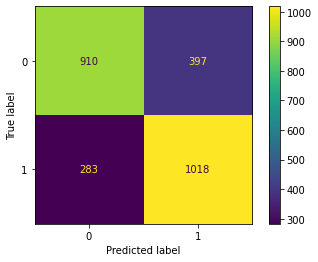

Accuracy Score: 0.73926
Precision Score: 0.71943
Recall Score: 0.78248
F1 Score: 0.74963


In [52]:
DT = DecisionTreeClassifier(criterion='entropy').fit(train_x, train_y)
predict_test = DT.predict(test_x)
predict_train = DT.predict(train_x)
measure_performance(DT, predict_test, predict_train, test_y, train_y)

LogisticRegression()


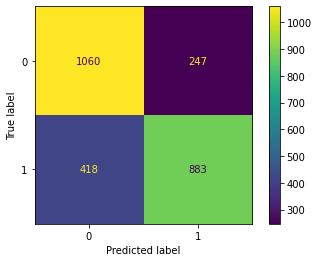

Accuracy Score: 0.74502
Precision Score: 0.78142
Recall Score: 0.67871
F1 Score: 0.72645


In [53]:
LR = LogisticRegression().fit(train_x, train_y)
predict_test = LR.predict(test_x)
predict_train = LR.predict(train_x)
measure_performance(LR, predict_test, predict_train, test_y, train_y)

GaussianNB()


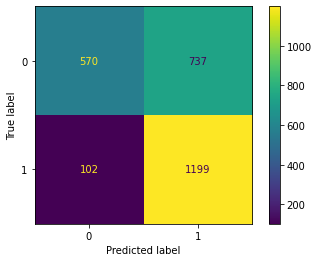

Accuracy Score: 0.67830
Precision Score: 0.61932
Recall Score: 0.92160
F1 Score: 0.74081


In [54]:
NB = GaussianNB().fit(train_x, train_y)
predict_test = NB.predict(test_x)
predict_train = NB.predict(train_x)
measure_performance(NB, predict_test, predict_train, test_y, train_y)

RandomForestClassifier()


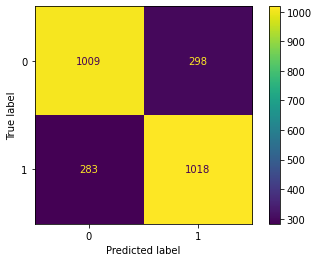

Accuracy Score: 0.77722
Precision Score: 0.77356
Recall Score: 0.78248
F1 Score: 0.77799


In [55]:
RF = RandomForestClassifier().fit(train_x, train_y)
predict_test = RF.predict(test_x)
predict_train = RF.predict(train_x)
measure_performance(RF, predict_test, predict_train, test_y, train_y)